<span style="color: green; font-size: 40px; font-weight: bold;"> Projeto (Classificação com PySpark) </span>
<br> <br>

# Análise de Sentimentos em Notícias de Criptomoedas com PySpark e Machine Learning

<br>

### Contexto

Neste mini-projeto, vamos explorar um importante contexto de negócio na área de finanças: a **análise de sentimentos em notícias de criptomoedas**. O projeto será desenvolvido desde a concepção do problema de negócio até a entrega de um modelo preditivo, utilizando ferramentas comuns de análise de dados no dia a dia de um Cientista de Dados. Apesar do foco ser em ferramentas de análise de dados, o projeto não serve como aconselhamento financeiro.

<br>

### Objetivo

O objetivo deste mini-projeto é **construir um modelo de Machine Learning capaz de analisar os sentimentos em notícias de criptomoedas**. Usaremos dados de notícias sobre criptomoedas para treinar o modelo. Este projeto pode ser estendido para outras áreas ou tópicos onde a análise de sentimentos em textos seja relevante.

<br>

### Pergunta de Negócio Principal

"Como podemos analisar os sentimentos em notícias sobre criptomoedas usando dados textuais e ferramentas de Machine Learning?"

<br>

### Entregável

O entregável deste mini-projeto será um **modelo de Machine Learning treinado para classificar o sentimento das notícias de criptomoedas**. O modelo será desenvolvido utilizando dados textuais de notícias sobre criptomoedas e será capaz de fazer previsões em tempo real com base em novos dados de entrada. O processo incluirá a concepção do problema de negócio, preparação dos dados, desenvolvimento do modelo, e a entrega do modelo preditivo.

<br>

### Sobre o Conjunto de Dados

Os dados utilizados neste mini-projeto abrangem o período de 12 de outubro de 2021 a 19 de dezembro de 2023. O arquivo CSV contém registros de notícias de criptomoedas, incluindo título, texto, fonte, assunto e análise de sentimentos.

A análise de sentimentos foi realizada usando a biblioteca textblob, que inclui polaridade e subjetividade.

<br>

Para este projeto, utilizaremos o conjunto de dados "Crypto News", que contém informações detalhadas sobre artigos de notícias relacionadas a criptomoedas. O conjunto de dados inclui os seguintes campos:

<br>
<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>date</td>
    <td>datetime</td>
    <td>Data e hora em que o artigo foi publicado (UTC).</td>
  </tr>
  <tr>
    <td>source</td>
    <td>string</td>
    <td>Fonte do artigo (ex: cryptonews.com, cointelegraph.com).</td>
  </tr>
  <tr>
    <td>subject</td>
    <td>string</td>
    <td>Assunto do artigo.</td>
  </tr>
  <tr>
    <td>title</td>
    <td>string</td>
    <td>Título do artigo.</td>
  </tr>
  <tr>
    <td>text</td>
    <td>string</td>
    <td>Primeiro parágrafo do artigo.</td>
  </tr>
  <tr>
    <td>sentiment</td>
    <td>json</td>
    <td>Análise de sentimentos do artigo, incluindo classe (positivo, negativo, neutro), polaridade e subjetividade.</td>
  </tr>
  <tr>
    <td>url</td>
    <td>string</td>
    <td>URL do artigo.</td>
  </tr>
</table>

<br> <br> <br>

# Importando Pacotes

In [1]:
# Importa o findspark e inicializa
import findspark
findspark.init()

## Bibliotecas de Manipulação e Análise de Dados

import pandas as pd                      # Biblioteca para manipulação e análise de dados tabulares.
import numpy as np                       # Biblioteca para cálculos numéricos e manipulação de arrays.


## Bibliotecas de Visualização de Dados

import seaborn as sns                    # Biblioteca para visualização de dados estatísticos.
from matplotlib import pyplot as plt     # Biblioteca para criação de gráficos e visualizações.


## Bibliotecas Principais do PySpark

import pyspark                           # Biblioteca para processamento de dados em grande escala usando clusters.
from pyspark import SparkConf            # Configuração e criação do contexto do Spark.
from pyspark import SparkContext         # Configuração e criação do contexto do Spark.   
from pyspark.sql import SparkSession     # Criação e manipulação de sessões e contextos SQL no Spark.
from pyspark.sql import SQLContext       # Criação e manipulação de sessões e contextos SQL no Spark.
from pyspark.sql.types import *          # Tipos de dados usados na criação de schemas de DataFrames no Spark.
from pyspark.sql.functions import *      # Funções SQL usadas para manipulação e transformação de dados no Spark.
from pyspark.sql.functions import col, count, when, isnan
from pyspark.sql.functions import from_unixtime, col, expr, date_format, from_utc_timestamp
from pyspark.sql import functions as F

## Bibliotecas de Machine Learning no PySpark

from pyspark.ml.linalg import Vectors               # Estruturas de dados para manipulação de vetores na MLlib do Spark.
from pyspark.ml.feature import StringIndexer        # Transformação de variáveis categóricas em numéricas.
from pyspark.ml.classification import LogisticRegression  # Algoritmo de regressão logística na MLlib do Spark.
from pyspark.ml.classification import LogisticRegressionModel
from pyspark.ml.classification import DecisionTreeClassifier  # Algoritmo de árvore de decisão para classificação.
from pyspark.ml.classification import RandomForestClassifier  # Algoritmo de floresta aleatória para classificação.
from pyspark.ml.classification import GBTClassifier           # Algoritmo de gradiente boosting para classificação.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator  # Avaliação de modelos de classificação.

from pyspark.ml.feature import MinMaxScaler             # Normalização dos dados para um intervalo específico.
from pyspark.ml.feature import VectorAssembler   # Combinação de múltiplas colunas em uma única coluna de vetores.
from pyspark.ml import Pipeline          # Construção de pipelines de ML que consistem em uma sequência de etapas.
from pyspark.ml.tuning import ParamGridBuilder    # Ferramentas para construção de grids de parâmetros.
from pyspark.ml.tuning import CrossValidator      # Ferramentas para construção de validação cruzada.
from pyspark.ml.tuning import CrossValidatorModel # Ferramentas para construção de validação cruzada.
from pyspark.ml.feature import StandardScaler     # Normalização de dados para ter média zero e variância unitária.

from pyspark.ml import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from pyspark.ml import PipelineModel
import zipfile

from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
import json
from pyspark.ml.feature import IndexToString, StringIndexerModel

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [2]:
## Formatação das saídas

# Configura o Pandas para mostrar até 200 colunas ao exibir um DataFrame
pd.set_option('display.max_columns', 200)

# Configura o Pandas para mostrar até 400 caracteres por coluna ao exibir um DataFrame
pd.set_option('display.max_colwidth', 400)

# Configuramos matplotlib_axes_logger para exibir apenas mensagens de erro 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

findspark : 2.0.1
pandas    : 1.3.5
joblib    : 1.4.2
pyspark   : 3.5.1
matplotlib: 3.4.3
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
seaborn   : 0.11.2
numpy     : 1.22.4
decimal   : 1.70
json      : 2.0.9



<br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Preparando o Ambiente Spark</span>

In [4]:
# Definindo semente aleatória (seed) para reprodutibilidade do notebook
rnd_seed = 23
np.random.seed = rnd_seed
np.random.set_state = rnd_seed

# Criando o Spark Context
conf = SparkConf().setAppName("Mini-Projeto3") \
                  .set("spark.ui.showConsoleProgress", "false") \
                  .set("spark.executor.heartbeatInterval", "20s") \
                  .set("spark.eventLog.enabled", "false") \
                  .set("spark.sql.shuffle.partitions", "2") \
                  .set("spark.sql.debug.maxToStringFields", "100") \
                  .set("spark.executor.memory", "4g") \
                  .set("spark.driver.memory", "4g") \
                  .set("spark.driver.maxResultSize", "2g")  # Configuração adicional para limitar o tamanho do resultado

# Criar o Spark Context e a Spark Session
sc = SparkContext(conf=conf)
spark_session = SparkSession.builder.config(conf=conf).getOrCreate()

# Ajustar o nível de log para ERROR
sc.setLogLevel("ERROR")

# Configurar log4j para suprimir avisos (deixar como comentário e volta ao normal)
log4j_logger = sc._jvm.org.apache.log4j
log4j_logger.LogManager.getLogger("org").setLevel(log4j_logger.Level.ERROR)
log4j_logger.LogManager.getLogger("akka").setLevel(log4j_logger.Level.ERROR)

# Visualizar o objeto spark_session
spark_session

24/07/22 15:46:03 WARN Utils: Your hostname, eduardo-Inspiron-15-3520 resolves to a loopback address: 127.0.1.1; using 192.168.0.13 instead (on interface wlp0s20f3)
24/07/22 15:46:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/22 15:46:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Carregando os Dados</span>

In [5]:
# Carrega os dados a partir da sessão Spark
df_spark = spark_session.read.csv('dados/cryptonews.csv', header = 'true', inferSchema = 'true')

In [6]:
# Visualiza as 5 primeiras linhas dos dados
df_spark.show(5)

# Visualiza total de linhas
df_spark.count()

+-------------------+--------------------+-------------+----------+--------------------+--------------------+--------------------+
|               date|           sentiment|       source|   subject|                text|               title|                 url|
+-------------------+--------------------+-------------+----------+--------------------+--------------------+--------------------+
|2023-12-19 06:40:41|{'class': 'negati...|   CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|
|2023-12-19 06:03:24|{'class': 'neutra...|   CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|
|2023-12-19 05:55:14|{'class': 'positi...|   CryptoNews|blockchain|According to the ...|Judge Approves Se...|https://cryptonew...|
|2023-12-19 05:35:26|{'class': 'positi...|CoinTelegraph|blockchain|Some suggest EVM ...|Why a gold rush f...|https://cointeleg...|
|2023-12-19 05:31:08|{'class': 'neutra...|CoinTelegraph|  ethereum|A decision by bl

31037

In [7]:
# Visualiza os metadados (schema) - similar ao info()
df_spark.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)



<br>

## Renomeando Colunas

In [8]:
# Vamos renomear algumas colunas para facilitar a manipulação dos dados
df_spark = df_spark.withColumnRenamed("date", "datetime")

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;"> Análise Exploratória Inicial dos Dados </span>

<br>

### Função Para Análise Inicial

In [9]:
# Função Para Análise Inicial
def analise_inicial(df):
    # Exibir o schema do DataFrame
    print('\n\n INFO (schema)\n\n')
    df.printSchema()
    
    print('\n\n ------------------------------------------------------------------------------------------ \n\n')
    
    # Número de linhas
    print("Número de Linhas:", df.count())
    
    # Verificar valores ausentes em cada coluna
    print('\n\n TOTAL DE VALORES NaN por Coluna \n')
    
    # Verifica os valores nulos em cada coluna
    valores_ausentes = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    valores_ausentes.show()

    # Verificar se existe alguma variável com valores ausentes
    valores_ausentes_boolean = any(row[c] > 0 for row in valores_ausentes.collect() for c in df.columns)

    # Nomes das variáveis com valores ausentes
    variaveis_ausentes = [c for c in df.columns if df.filter(col(c).isNull()).count() > 0]

    # Número de linhas duplicadas
    num_linhas_total = df.count()
    num_linhas_distintas = df.distinct().count()
    num_linhas_duplicadas = num_linhas_total - num_linhas_distintas

    # Porcentagem de linhas duplicadas
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / num_linhas_total) * 100

    # Total de linhas com pelo menos um valor ausente
    total_linhas_ausentes = df.filter(
        " OR ".join([f"(`{c}` IS NULL)" for c in df.columns])
    ).count()

    # Porcentagem de linhas com pelo menos um valor ausente
    porcentagem_linhas_ausentes = (total_linhas_ausentes / num_linhas_total) * 100

    # Exibe o resultado
    print("\n\nExistem valores ausentes:", valores_ausentes_boolean)
    
    if valores_ausentes_boolean:
        print("\nVariáveis com valores ausentes:", variaveis_ausentes)
        print("\nTotal de Linhas com Valores Ausentes:", total_linhas_ausentes)
        print("\nPorcentagem de Linhas Com Valor Ausente: {:.2f}%".format(porcentagem_linhas_ausentes))
    else:
        print("\nNenhuma variável possui valores ausentes.")
    
    print("\n\n\nExistem valores duplicados:", num_linhas_duplicadas > 0)
    
    if num_linhas_duplicadas > 0:
        print("\nNúmero de Linhas Duplicadas:", num_linhas_duplicadas)
        print("\nPorcentagem de Linhas Duplicadas: {:.2f}%\n".format(porcentagem_linhas_duplicadas))
    else:
        print("\nNenhuma variável possui valores duplicados.\n")

# Exemplo de uso da função com o DataFrame df_spark
analise_inicial(df_spark)



 INFO (schema)


root
 |-- datetime: timestamp (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)



 ------------------------------------------------------------------------------------------ 


Número de Linhas: 31037


 TOTAL DE VALORES NaN por Coluna 

+--------+---------+------+-------+----+-----+---+
|datetime|sentiment|source|subject|text|title|url|
+--------+---------+------+-------+----+-----+---+
|       0|        0|     0|      0|   0|    0|  0|
+--------+---------+------+-------+----+-----+---+



Existem valores ausentes: False

Nenhuma variável possui valores ausentes.



Existem valores duplicados: False

Nenhuma variável possui valores duplicados.



<br><br>

# Visualizando os Tipos dos Dados Separadamente

<br>

#### Visualizando Variáveis Categóricas e Numéricas

- Todas as variáveis são categóricas neste dataframe.

<br><br>

## Analisando Todas as Variáveis

#### Resumo Estatístico

In [10]:
def resumo_estatistico_categorico(df):
    # Para cada coluna, contar o número de valores únicos e a moda
    for column in df.columns:
        print(f"\nResumo Estatístico para a Coluna: {column}\n")
        
        # Contar o número de valores únicos
        unique_count = df.select(column).distinct().count()
        print(f"Número de valores únicos: {unique_count}")
        
        # Contar as ocorrências de cada valor
        value_counts = df.groupBy(column).count().orderBy(F.desc("count"))
        value_counts.show(5)
        
        # Encontrar a moda
        moda = value_counts.first()
        print(f"Moda: {moda[column]} (ocorrências: {moda['count']})")

# Exemplo de uso da função com o DataFrame df_spark
resumo_estatistico_categorico(df_spark)


Resumo Estatístico para a Coluna: datetime

Número de valores únicos: 30496
+-------------------+-----+
|           datetime|count|
+-------------------+-----+
|2022-01-14 00:00:00|   26|
|2023-05-25 00:00:00|   15|
|2022-01-12 00:00:00|   14|
|2022-01-13 00:00:00|   12|
|2023-05-22 00:00:00|   11|
+-------------------+-----+
only showing top 5 rows

Moda: 2022-01-14 00:00:00 (ocorrências: 26)

Resumo Estatístico para a Coluna: sentiment

Número de valores únicos: 3931
+--------------------+-----+
|           sentiment|count|
+--------------------+-----+
|{'class': 'neutra...| 6916|
|{'class': 'positi...|  655|
|{'class': 'positi...|  498|
|{'class': 'neutra...|  484|
|{'class': 'neutra...|  380|
+--------------------+-----+
only showing top 5 rows

Moda: {'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0} (ocorrências: 6916)

Resumo Estatístico para a Coluna: source

Número de valores únicos: 3
+-------------+-----+
|       source|count|
+-------------+-----+
|CoinTelegraph|13

<br> <br> <br>
# <span style="color: green; font-size: 38px; font-weight: bold;"> Criando Tabela Temporária </span>

- As tabelas temporárias são úteis quando você deseja que o conjunto de resultados fique visível para todas as outras sessões Spark

In [11]:
# Cria uma tabela temporária a partir do dataframe (se não existir, ele cria)
df_spark.createOrReplaceTempView('dados_crypto')

# Executa a Consulta SQL e Cria um Novo DataFrame
dados = spark_session.sql("SELECT * FROM dados_crypto")

print(dados.show(5))

+-------------------+--------------------+-------------+----------+--------------------+--------------------+--------------------+
|           datetime|           sentiment|       source|   subject|                text|               title|                 url|
+-------------------+--------------------+-------------+----------+--------------------+--------------------+--------------------+
|2023-12-19 06:40:41|{'class': 'negati...|   CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|
|2023-12-19 06:03:24|{'class': 'neutra...|   CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|
|2023-12-19 05:55:14|{'class': 'positi...|   CryptoNews|blockchain|According to the ...|Judge Approves Se...|https://cryptonew...|
|2023-12-19 05:35:26|{'class': 'positi...|CoinTelegraph|blockchain|Some suggest EVM ...|Why a gold rush f...|https://cointeleg...|
|2023-12-19 05:31:08|{'class': 'neutra...|CoinTelegraph|  ethereum|A decision by bl

<br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Limpeza nos Dados</span>

<br>

### Tratando Valores Ausentes

- Iremos remover todas as linhas com valores ausentes (não faz sentido qualquer tratamento aqui, pois todas as colunas de cotações estão como NaN)

In [12]:
# Quantidade de Linha
print(dados.count())

# Remove valores NA 
dados = dados.dropna('any')

# Quantidade de Linha
print(dados.count())

31037
31037


<br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Features Engineering</span>

<br> <br>

### Criando nova variável: sentiment_class

- Criada a partir da transformação da coluna <i>sentiment</i>, apenas com os Sentimentos.

In [13]:
# Definir uma função para validar e extrair a classe de sentimento
def get_sentiment_class(sentiment):
    try:
        sentiment_json = json.loads(sentiment.replace("'", "\""))
        return sentiment_json['class']
    except json.JSONDecodeError:
        return None

# Registrar a UDF
get_sentiment_class_udf = udf(get_sentiment_class, StringType())

# Aplicar a UDF para criar uma nova coluna 'sentiment_class'
dados = dados.withColumn('sentiment_class', get_sentiment_class_udf(col('sentiment')))

# Mostrar as primeiras linhas para verificar a nova coluna
dados.show(2)

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+
only showing top 2 rows



### Criando nova variável: polarity

- Criada a partir da transformação da coluna <i>sentiment</i>, com um valor numérico que representa a intensidade do sentimento. Pode variar de -1 (extremamente negativo) a 1 (extremamente positivo).

In [14]:
# Definir uma função para extrair a polaridade
def get_sentiment_polarity(sentiment):
    try:
        sentiment_json = json.loads(sentiment.replace("'", "\""))
        return sentiment_json['polarity']
    except json.JSONDecodeError:
        return None

# Registrar a UDF
get_sentiment_polarity_udf = udf(get_sentiment_polarity, StringType())

# Aplicar a UDF para criar uma nova coluna 'polarity'
dados = dados.withColumn('polarity', get_sentiment_polarity_udf(col('sentiment')))

# Mostrar as primeiras linhas para verificar a nova coluna
dados.show(2)

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+
only showing top 2 rows



### Criando nova variável: subjectivity

- Criada a partir da transformação da coluna <i>sentiment</i>,valor numérico que indica quão subjetiva é a notícia. Pode variar de 0 (completamente objetiva) a 1 (completamente subjetiva).

 

In [15]:
# Definir uma função para extrair a subjetividade
def get_sentiment_subjectivity(sentiment):
    try:
        sentiment_json = json.loads(sentiment.replace("'", "\""))
        return sentiment_json['subjectivity']
    except json.JSONDecodeError:
        return None

# Registrar a UDF
get_sentiment_subjectivity_udf = udf(get_sentiment_subjectivity, StringType())

# Aplicar a UDF para criar uma nova coluna 'subjectivity'
dados = dados.withColumn('subjectivity', get_sentiment_subjectivity_udf(col('sentiment')))

# Mostrar as primeiras linhas para verificar as novas colunas
dados.show(2)

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+
only

<br>

### Criando nova variável: date

- Criada a partir da transformação da coluna <i>datetime</i>, extraindo a parte da data.

In [16]:
# Adicionar uma nova coluna 'date'
dados = dados.withColumn("date", split(col("dateTime"), " ").getItem(0))

print(dados.show(2))

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|      date|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|2023-12-19|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|2023-12-19|
+-------------------+--------------------+----------+----------+--------------------+--------------------+---------

<br>

### Criando nova variável: time

- Criada a partir da transformação da coluna <i>dateTime</i>, extraindo a parte do tempo.

In [17]:
# Adicionar uma nova coluna 'time'
dados = dados.withColumn("time", split(col("dateTime"), " ").getItem(1))

print(dados.show(2))

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|      date|    time|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|2023-12-19|06:40:41|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|2023-12-19|06:03:24|
+-------------------+--------------------+----------+----------+------

<br>

### Criando nova variável: hour

- Criada a partir da transformação da coluna <i>time</i>, extraindo a hora.

In [18]:
# Adicionar uma nova coluna 'hour'
dados = dados.withColumn("hour", split(col("time"), ":").getItem(0))

print(dados.show(2))

+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+
|           datetime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|      date|    time|hour|
+-------------------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+
|2023-12-19 06:40:41|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|2023-12-19|06:40:41|  06|
|2023-12-19 06:03:24|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|2023-12-19|06:03:24|  06|
+-------------------+--------------------+---

<br>

### Criando nova variável: day_of_week

- Criada a partir do ajuste do formato das colunas data e extrai o dia da semana (está convertendo o tipo de dados de três colunas: "date", "hour" e "dateTime").

In [19]:
# Vamos ajustar o formato da data para extrair o dia da semana
dados = dados.withColumn("date", dados["date"].cast(DateType())).withColumn("hour", dados["hour"].cast(DoubleType())).withColumn("dateTime", dados["dateTime"].cast(DateType()))

# Vamos extrair o dia da semana
dados = dados.withColumn('day_of_week', dayofweek(dados['date']))

print(dados.show(2))

+----------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+-----------+
|  dateTime|           sentiment|    source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|      date|    time|hour|day_of_week|
+----------+--------------------+----------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+-----------+
|2023-12-19|{'class': 'negati...|CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|2023-12-19|06:40:41| 6.0|          3|
|2023-12-19|{'class': 'neutra...|CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|2023-12-19|06:03:24| 6.0|          3|
+----------+------------------

<br>

### Criando nova variável: year

- Representa o ano da cotação

In [20]:
# Vamos extrair o ano da cotação
dados = dados.withColumn("year", split(col("date"),"-").getItem(0))

print(dados.show(5))

+----------+--------------------+-------------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+-----------+----+
|  dateTime|           sentiment|       source|   subject|                text|               title|                 url|sentiment_class|polarity|subjectivity|      date|    time|hour|day_of_week|year|
+----------+--------------------+-------------+----------+--------------------+--------------------+--------------------+---------------+--------+------------+----------+--------+----+-----------+----+
|2023-12-19|{'class': 'negati...|   CryptoNews|   altcoin|Grayscale CEO Mic...|Grayscale CEO Cal...|https://cryptonew...|       negative|    -0.1|         0.6|2023-12-19|06:40:41| 6.0|          3|2023|
|2023-12-19|{'class': 'neutra...|   CryptoNews|blockchain|In an exclusive i...|Indian Government...|https://cryptonew...|        neutral|     0.0|         0.0|2023-12-19|06:03:24| 6.0|        

In [21]:
# Verificando colunas
print(dados.printSchema())

root
 |-- dateTime: date (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- sentiment_class: string (nullable = true)
 |-- polarity: string (nullable = true)
 |-- subjectivity: string (nullable = true)
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)

None


<br> <br> <br>

# Convertendo o dataframe do <i>Spark</i> para o <i>Pandas</i>

- Isso é feito para facilitar a análise.

In [22]:
# Convertendo
df_pandas = dados.toPandas()

display(df_pandas)

,dateTime,sentiment,source,subject,text,title,url,sentiment_class,polarity,subjectivity,date,time,hour,day_of_week,year
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the SEC needs to approve spot Bitcoin exchange-traded funds (ETFs) simultaneously.,Grayscale CEO Calls for Simultaneous Approval of Spot Products to Level the Field,https://cryptonews.comhttps://cryptonews.com/news/grayscale-ceo-calls-for-simultaneous-approval-of-spot-products-to-level-the-field.htm,negative,-0.1,0.6,2023-12-19,06:40:41,6.0,3,2023
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0}",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Manhar Garegrat, the Country Head for India and Global Partnerships of Liminal Custody, shares insights into crypto industry's collaborations with India government.",Indian Government is Actively Collaborating With Crypto Industry: Liminal Custody’s Country Head,https://cryptonews.comhttps://cryptonews.com/news/indian-government-is-actively-collaborating-with-crypto-industry.htm,neutral,0.0,0.0,2023-12-19,06:03:24,6.0,3,2023
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subjectivity': 0.05}",CryptoNews,blockchain,"According to the Federal Court ruling on December 18, former Binance CEO Changpeng 'CZ' Zhao has been ordered to pay $150 million, while Binance will pay $2.7 billion to conclude the CFTC enforcement action.","Judge Approves Settlement: Binance to Pay $1.5 Billion to CFTC, CZ to Pay $150 Million Fine",https://cryptonews.comhttps://cryptonews.com/news/judge-approves-settlement-binance-to-pay-1-5-billion-to-cftc-cz-to-pay-150-million-fine.htm,positive,0.05,0.05,2023-12-19,05:55:14,5.0,3,2023
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjectivity': 0.9}",CoinTelegraph,blockchain,"Some suggest EVM inscriptions are the latest way for retail to access low-cap coins, while others argue it’s an over-hyped fad. Whatever it is, it’s clogging up the blockchain.",Why a gold rush for inscriptions has broken half a dozen blockchains,https://cointelegraph.com/news/inscriptions-evm-frenzy-clogs-up-blockchains,positive,0.5,0.9,2023-12-19,05:35:26,5.0,3,2023
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0}",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censoring OFAC-sanctioned blocks has been seen as a loss for Ethereum censorship resistance.,‘Concerning precedent’ — bloXroute Labs' MEV relays to reject OFAC blocks,https://cointelegraph.com/news/concerning-precedent-bloxroute-labs-mev-relays-to-reject-ofac-blocks,neutral,0.0,0.0,2023-12-19,05:31:08,5.0,3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27,"{'class': 'neutral', 'polarity': 0.0, 'subjectivity': 0.0}",CryptoNews,defi,Cream Finance (CREAM) suffered another flash loan attack.,Cream Finance Suffers Another Exploit as Attacker Runs Away With USD 100M+,https://cryptonews.com/news/cream-finance-suffers-another-exploit-as-attacker-runs-away-with-usd-130m.htm,neutral,0.0,0.0,2021-10-27,15:17:00,15.0,4,2021
31033,2021-10-19,"{'class': 'positive', 'polarity': 0.1, 'subjectivity': 0.4}",CryptoNews,blockchain,Banque de France disclosed the results of its experimental program to use CBDC to exchange and settle tokenised government bonds.,French Central Bank's Blockchain Bond Trial Brings First Results,https://cryptonews.com/news/french-central-banks-blockchain-bond-trial-bringsfirst-results.htm,positive,0.1,0.4,2021-10-19,13:39:00,13.0,3,2021
31034,2021-10-18,"{'class': 'positive', 'polarity': 0.14, 'subjectivity': 0.45}",CryptoNews,blockchain,"Advancing its project to become \x9caÂ\xa0metaverseÂ\xa0company,\x9dÂ\xa0 Facebook unveiled a plan to rollout some 10,000 new high-skilled jobs.","Facebook To Add 10,000 Jobs In EU For Metaverse Project",https://cryptonews.com/news/facebook-to-add-10000-jobs-in-eu-for-metaverse-project.htm,positive,0.14,0.45,2021-10-

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Análise Exploratória com Gráficos</span>

<br><br>

### Distribuição dos Sentimentos

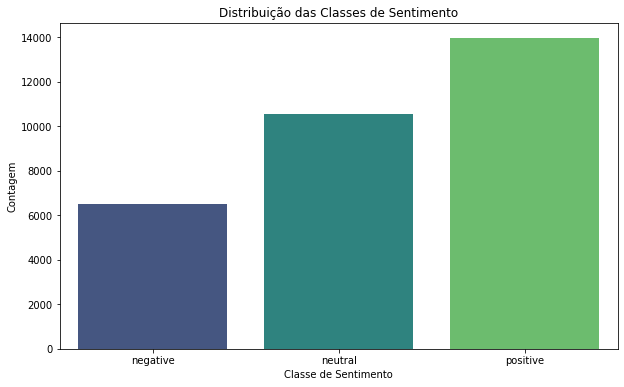

In [23]:
# Contagem de cada classe de sentimento
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=df_pandas, palette='viridis')
plt.title('Distribuição das Classes de Sentimento')
plt.xlabel('Classe de Sentimento')
plt.ylabel('Contagem')
plt.show()

<br>

### Distribuição dos Polaridade

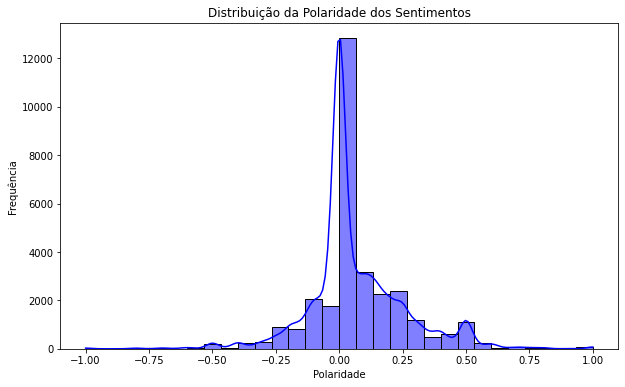

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['polarity'].astype(float), bins=30, kde=True, color='blue')
plt.title('Distribuição da Polaridade dos Sentimentos')
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.show()

<br>

### Distribuição dos Subjetividade

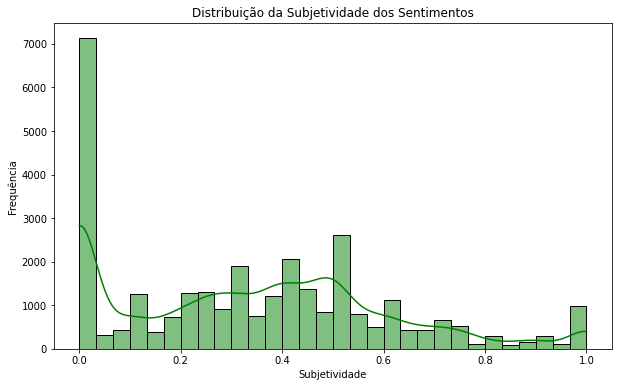

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['subjectivity'].astype(float), bins=30, kde=True, color='green')
plt.title('Distribuição da Subjetividade dos Sentimentos')
plt.xlabel('Subjetividade')
plt.ylabel('Frequência')
plt.show()

<br>

### Análise Temporal dos Sentimentos

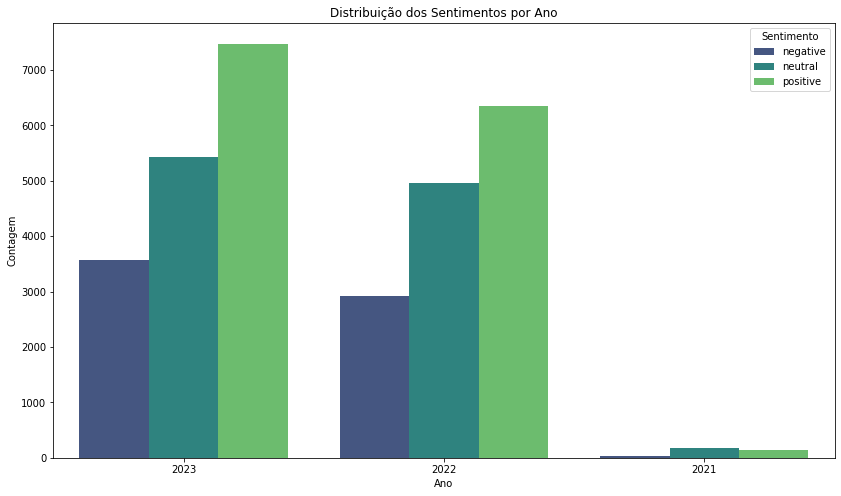

In [26]:
# Contagem de sentimentos por ano
plt.figure(figsize=(14, 8))
sns.countplot(x='year', hue='sentiment_class', data=df_pandas, palette='viridis')
plt.title('Distribuição dos Sentimentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Sentimento')
plt.show()

<br>

### Sentimento por Fonte de Notícias

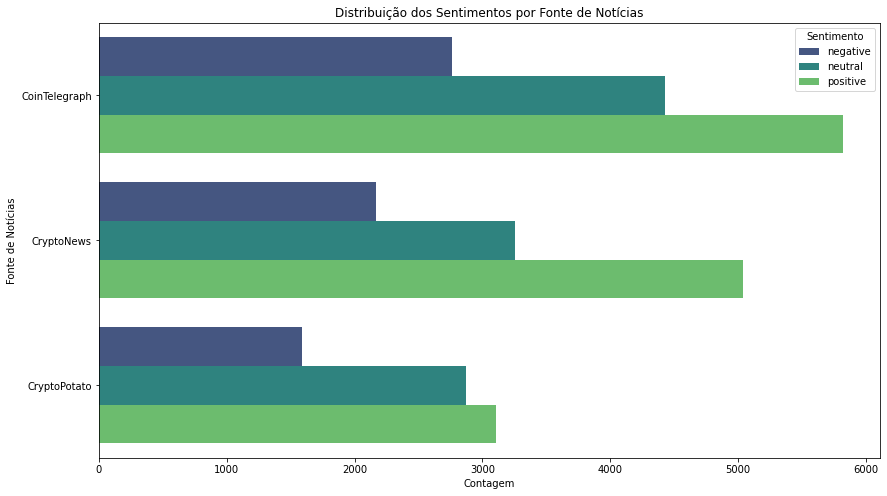

In [27]:
# Contagem de sentimentos por fonte de notícia
plt.figure(figsize=(14, 8))
sns.countplot(y='source', hue='sentiment_class', data=df_pandas, palette='viridis', order=df_pandas['source'].value_counts().index)
plt.title('Distribuição dos Sentimentos por Fonte de Notícias')
plt.xlabel('Contagem')
plt.ylabel('Fonte de Notícias')
plt.legend(title='Sentimento')
plt.show()

<br>

### Sentimento ao Longo do Dia

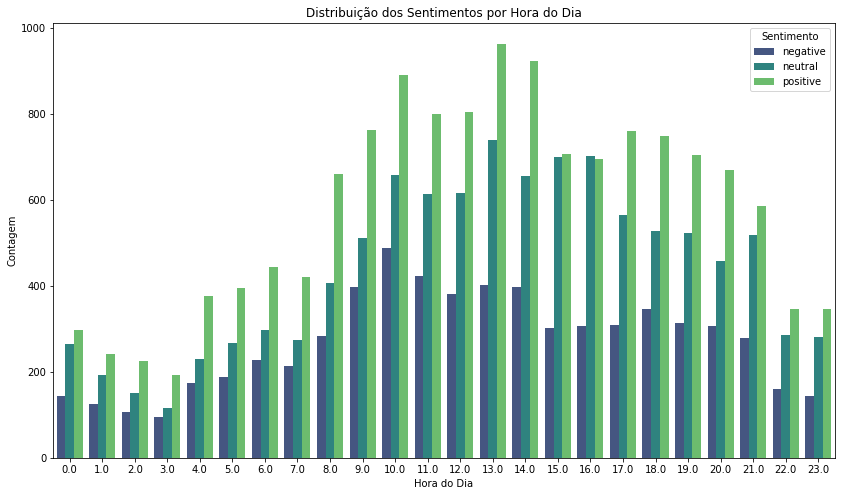

In [28]:
# Contagem de sentimentos por hora do dia
plt.figure(figsize=(14, 8))
sns.countplot(x='hour', hue='sentiment_class', data=df_pandas, palette='viridis')
plt.title('Distribuição dos Sentimentos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem')
plt.legend(title='Sentimento')
plt.show()

<br>

### Distribuição da Fonte de Notícia

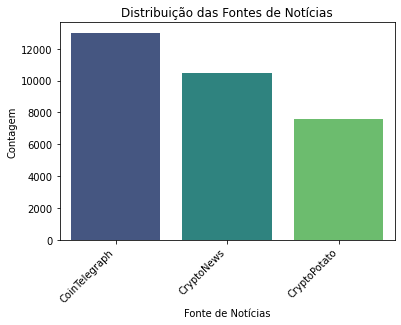

In [29]:
# Contar a frequência de cada fonte de notícias
source_counts = df_pandas['source'].value_counts()

# Criar o gráfico de barras
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Distribuição das Fontes de Notícias')
plt.xlabel('Fonte de Notícias')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

<br>

### Distribuição da Frequência de Cada Assunto

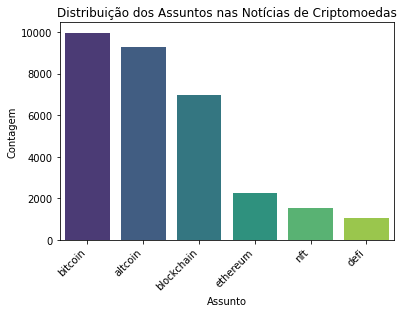

In [30]:
# Contar a frequência de cada assunto
subject_counts = df_pandas['subject'].value_counts()

# Criar o gráfico de barras
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Distribuição dos Assuntos nas Notícias de Criptomoedas')
plt.xlabel('Assunto')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

<br> <br>

# Label Encoding para Correlação

In [31]:
# Removendo as colunas irrelevantes
df_pandas = df_pandas.drop(columns=['dateTime', 'sentiment', 'text', 'title', 'time', 'url', 'date'])

from sklearn.preprocessing import LabelEncoder

# Colunas categóricas que precisam de label encoding
categorical_columns = ['source', 'subject', 'sentiment_class', 'year']

# Aplicando Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_pandas[column] = le.fit_transform(df_pandas[column])
    label_encoders[column] = le

# Verificando as primeiras linhas do dataframe para garantir que a codificação foi aplicada
print(df_pandas.head())

   source  subject  sentiment_class polarity subjectivity  hour  day_of_week  \
0       1        0                0     -0.1          0.6   6.0            3   
1       1        2                1      0.0          0.0   6.0            3   
2       1        2                2     0.05         0.05   5.0            3   
3       0        2                2      0.5          0.9   5.0            3   
4       0        4                1      0.0          0.0   5.0            3   

   year  
0     2  
1     2  
2     2  
3     2  
4     2  


<br>

#### Correlação

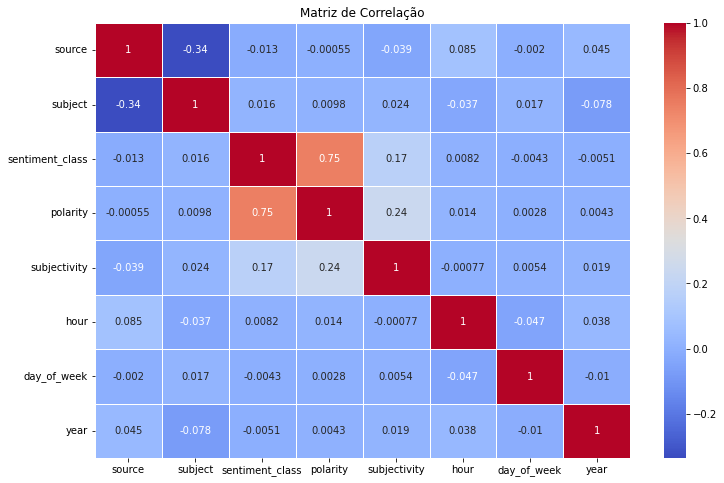

In [32]:
# Convertendo as colunas 'polarity' e 'subjectivity' para numéricas
df_pandas['polarity'] = pd.to_numeric(df_pandas['polarity'])
df_pandas['subjectivity'] = pd.to_numeric(df_pandas['subjectivity'])

# Calculando a correlação
correlation_matrix = df_pandas.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

<br> <br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Engenharia de Atributos</span>

- Nesta etapa aplicaremos iremos **remover colunas** não relevantes e iremos **aplicar Label Encoding** e também **aplicar a função VectorAssembler** que é um transformador que combina uma determinada lista de colunas em uma única coluna de vetor e ao final faremos **tratamento de escala**. 

<br>

### Removendo Colunas

- Como vimos anteriormente as colunas 'dateTime', 'sentiment', 'text', 'title', 'time', 'url' e 'date' não são relevantes ou não aparesentam correlação significativa com a variável alvo **sentiment_class**.

In [33]:
# Removendo as colunas irrelevantes
colunas_para_remover = ['dateTime', 'sentiment', 'text', 'title', 'time', 'url', 'date']
dados = dados.drop(*colunas_para_remover)

# Exibindo o esquema para verificar as alterações
dados.printSchema()

root
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- sentiment_class: string (nullable = true)
 |-- polarity: string (nullable = true)
 |-- subjectivity: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)



In [34]:
dados.show(2)

+----------+----------+---------------+--------+------------+----+-----------+----+
|    source|   subject|sentiment_class|polarity|subjectivity|hour|day_of_week|year|
+----------+----------+---------------+--------+------------+----+-----------+----+
|CryptoNews|   altcoin|       negative|    -0.1|         0.6| 6.0|          3|2023|
|CryptoNews|blockchain|        neutral|     0.0|         0.0| 6.0|          3|2023|
+----------+----------+---------------+--------+------------+----+-----------+----+
only showing top 2 rows



<br>

### Aplicando Label Encoding e Vector Assemble

In [35]:
# StringIndexer para colunas categóricas (incluindo a variável alvo)
categorical_columns = ['source', 'subject', 'polarity', 'subjectivity', 'year', 'sentiment_class']
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]

# VectorAssembler para combinar todas as colunas de recursos em uma única coluna de vetor (exceto a variável alvo indexada)
assembler = VectorAssembler(
    inputCols=[f"{col}_index" for col in categorical_columns[:-1]] + ['hour', 'day_of_week'],
    outputCol="features"
)

# Pipeline para aplicar StringIndexer e VectorAssembler
pipeline_preprocessing = Pipeline(stages=indexers + [assembler])

# Ajustar e transformar os dados com o pipeline de pré-processamento
pipeline_model_preprocessing = pipeline_preprocessing.fit(dados)
dados_transformados = pipeline_model_preprocessing.transform(dados)

# Exibir o esquema dos dados transformados
dados_transformados.printSchema()

# Mostrar uma amostra dos dados transformados
dados_transformados.show(2)

root
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- sentiment_class: string (nullable = true)
 |-- polarity: string (nullable = true)
 |-- subjectivity: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)
 |-- source_index: double (nullable = false)
 |-- subject_index: double (nullable = false)
 |-- polarity_index: double (nullable = false)
 |-- subjectivity_index: double (nullable = false)
 |-- year_index: double (nullable = false)
 |-- sentiment_class_index: double (nullable = false)
 |-- features: vector (nullable = true)

+----------+----------+---------------+--------+------------+----+-----------+----+------------+-------------+--------------+------------------+----------+---------------------+--------------------+
|    source|   subject|sentiment_class|polarity|subjectivity|hour|day_of_week|year|source_index|subject_index|polarity_index|subjectivity_index|y

In [36]:
# Salvar o pipeline de pré-processamento
pipeline_model_preprocessing.write().overwrite().save("pipeline_e_modelo/pipeline_preprocessing")

<br><br><br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br><br>


## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

<br>

In [37]:
# Dividir os dados em treino e teste
train_data, test_data = dados_transformados.randomSplit([0.8, 0.2], seed=42)

# StandardScaler para padronizar as características
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Pipeline para padronização
pipeline_scaling = Pipeline(stages=[scaler])

# Ajustar e transformar os dados de treino com o pipeline de padronização
pipeline_model_scaling = pipeline_scaling.fit(train_data)
train_data_scaled = pipeline_model_scaling.transform(train_data)
test_data_scaled = pipeline_model_scaling.transform(test_data)

# Salvar o pipeline de padronização
pipeline_model_scaling.write().overwrite().save("pipeline_e_modelo/pipeline_scaling")

<br><br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>


<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [38]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Logística (Benchmark)</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

In [39]:
## Criação e Treinamento do Modelo

# Criar o modelo de regressão logística
lr = LogisticRegression(labelCol="sentiment_class_index", featuresCol="scaled_features", maxIter=10)

# Treinar o modelo com os dados de treino escalados
lr_model = lr.fit(train_data_scaled)


## Previsão

# Realizar previsões com os dados de teste
predictions = lr_model.transform(test_data_scaled)


## Avaliação

# Avaliar o modelo
evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_class_index", predictionCol="prediction")

accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print('\n---------------------------------------------------------------------------------------------------\n')

# Criar um DataFrame para salvar as métricas
modelo_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Regressão Logística'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)
print('\n\n')

Acurácia: 0.7406
Precisão: 0.7041
Recall: 0.7406
F1-Score: 0.7118

---------------------------------------------------------------------------------------------------



,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

In [40]:
# Criar o modelo de regressão logística com ajuste de hiperparâmetros
lr = LogisticRegression(labelCol="sentiment_class_index", featuresCol="scaled_features")

# Definir a grade de parâmetros
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())

# Definir o cross-validator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="sentiment_class_index"),
                          numFolds=5)

# Treinar o modelo com os dados de treino escalados
lr_model_v2 = crossval.fit(train_data_scaled)

# Realizar previsões com os dados de teste
predictions = lr_model_v2.transform(test_data_scaled)

# Avaliar o modelo
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Criar um DataFrame para salvar as métricas
modelo_v2_metrics = pd.DataFrame({
    'Nome do Modelo': ['Regressão Logística'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v2_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

Acurácia: 0.7107
Precisão: 0.6656
Recall: 0.7107
F1-Score: 0.6564


,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
1,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 2 com DecisionTreeClassifier</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

In [41]:
# Criar o modelo de Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="sentiment_class_index", featuresCol="scaled_features")

# Treinar o modelo com os dados de treino escalados
dt_model = dt.fit(train_data_scaled)

# Realizar previsões com os dados de teste
predictions = dt_model.transform(test_data_scaled)

# Avaliar o modelo
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Criar um DataFrame para salvar as métricas
modelo_v1_dt_metrics = pd.DataFrame({
    'Nome do Modelo': ['Decision Tree Classifier'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v1_dt_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

Acurácia: 0.8449
Precisão: 0.8830
Recall: 0.8449
F1-Score: 0.8115


,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
1,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564
2,Decision Tree Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8449,0.8830,0.8449,0.8115


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

In [42]:
# Definir a grade de parâmetros
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 15])
             .addGrid(dt.maxBins, [32, 64])
             .build())

# Definir o cross-validator
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="sentiment_class_index"),
                          numFolds=5)

# Treinar o modelo com os dados de treino escalados
dt_model_v2 = crossval.fit(train_data_scaled)

# Realizar previsões com os dados de teste
predictions = dt_model_v2.transform(test_data_scaled)

# Avaliar o modelo
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Criar um DataFrame para salvar as métricas
modelo_v2_dt_metrics = pd.DataFrame({
    'Nome do Modelo': ['Decision Tree Classifier'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v2_dt_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

Acurácia: 0.9492
Precisão: 0.9492
Recall: 0.9492
F1-Score: 0.9485


,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
1,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564
2,Decision Tree Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8449,0.8830,0.8449,0.8115
3,Decision Tree Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.9492,0.9492,0.9492,0.9485


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 3 com RandomForestClassifier</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

In [43]:
# Criar o modelo de Random Forest Classifier
rf = RandomForestClassifier(labelCol="sentiment_class_index", featuresCol="scaled_features")

# Treinar o modelo com os dados de treino escalados
rf_model = rf.fit(train_data_scaled)

# Realizar previsões com os dados de teste
predictions = rf_model.transform(test_data_scaled)

# Avaliar o modelo
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Criar um DataFrame para salvar as métricas
modelo_v1_rf_metrics = pd.DataFrame({
    'Nome do Modelo': ['Random Forest Classifier'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v1_rf_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

Acurácia: 0.8057
Precisão: 0.8582
Recall: 0.8057
F1-Score: 0.7403


,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
1,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564
2,Decision Tree Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8449,0.8830,0.8449,0.8115
3,Decision Tree Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.9492,0.9492,0.9492,0.9485
4,Random Forest Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8057,0.8582,0.8057,0.7403


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

In [44]:
# Definir a grade de parâmetros
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20])
             .addGrid(rf.maxDepth, [5, 10])
             .build())

# Definir o cross-validator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="sentiment_class_index"),
                          numFolds=5)

# Treinar o modelo com os dados de treino escalados
rf_model_v2 = crossval.fit(train_data_scaled)

# Realizar previsões com os dados de teste
predictions = rf_model_v2.transform(test_data_scaled)

# Avaliar o modelo
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the metrics
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Criar um DataFrame para salvar as métricas
modelo_v2_rf_metrics = pd.DataFrame({
    'Nome do Modelo': ['Random Forest Classifier'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'Acurácia': [f"{accuracy:.4f}"],
    'Precisão': [f"{precision:.4f}"],
    'Recall': [f"{recall:.4f}"],
    'F1-Score': [f"{f1:.4f}"]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v2_rf_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

Acurácia: 0.8696
Precisão: 0.8730
Recall: 0.8696
F1-Score: 0.8574


,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
1,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564
2,Decision Tree Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8449,0.8830,0.8449,0.8115
3,Decision Tree Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.9492,0.9492,0.9492,0.9485
4,Random Forest Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8057,0.8582,0.8057,0.7403
5,Random Forest Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.8696,0.8730,0.8696,0.8574


<br><br>

# SELECIONANDO O MELHOR MODELO

- Usaremos o modelo com melhor Acurácia.

<br>

#### Visualizando Dataframe Ordenado

In [45]:
# Ordenando o DataFrame pelo (modificar sort_values)
df_modelos_sorted = df_modelos.sort_values(by='Acurácia', ascending=False).reset_index(drop=True)

# Visualizando Daframe
display(df_modelos_sorted)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,Acurácia,Precisão,Recall,F1-Score
0,Decision Tree Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.9492,0.9492,0.9492,0.9485
1,Random Forest Classifier,2,Original,Com Ajuste de Hiperparâmetros,0.8696,0.8730,0.8696,0.8574
2,Decision Tree Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8449,0.8830,0.8449,0.8115
3,Random Forest Classifier,1,Original,Sem Ajuste de Hiperparâmetros,0.8057,0.8582,0.8057,0.7403
4,Regressão Logística,1,Original,Sem Ajuste de Hiperparâmetros,0.7406,0.7041,0.7406,0.7118
5,Regressão Logística,2,Original,Com Ajuste de Hiperparâmetros,0.7107,0.6656,0.7107,0.6564


<br>

### Salvando Melhor Modelo

In [46]:
# Salvar o modelo treinado
dt_model_v2.write().overwrite().save("pipeline_e_modelo/dt_model_v2")

print('\n\nModelo salvo com sucesso.')



Modelo salvo com sucesso.


<br><br>

# Testando Modelo com Novos Dados

<br>

### Carregando Modelo e Pipeline Salvos

In [47]:
## Carregar e Verificar as Colunas e Tipos Usados no Modelo

# Carregar os pipelines e o modelo salvo
pipeline_preprocessing_loaded = PipelineModel.load("pipeline_e_modelo/pipeline_preprocessing")
pipeline_scaling_loaded = PipelineModel.load("pipeline_e_modelo/pipeline_scaling")
model_loaded = CrossValidatorModel.load("pipeline_e_modelo/dt_model_v2")

# Verificar as colunas e tipos usados no modelo
input_cols = pipeline_preprocessing_loaded.stages[-1].getInputCols()
print("Colunas usadas no modelo:")
print(input_cols)

# Obter os tipos das colunas originais
print("\nTipos das colunas originais:")
original_schema = dados.schema
for field in original_schema:
    print(f"{field.name}: {field.dataType.simpleString()}")

Colunas usadas no modelo:
['source_index', 'subject_index', 'polarity_index', 'subjectivity_index', 'year_index', 'hour', 'day_of_week']

Tipos das colunas originais:
source: string
subject: string
sentiment_class: string
polarity: string
subjectivity: string
hour: double
day_of_week: int
year: string


<br>

### Criando Novos Dados e Realizando as Previsões

In [48]:
## Previsões

# Criar um novo dataset com novos dados (sem a variável alvo)
novos_dados = [
    ("CryptoNews", "altcoin", "-0.1", "0.6", 6.0, 3, "2023"),
    ("CryptoNews", "blockchain", "0.0", "0.0", 6.0, 3, "2023"),
    ("CryptoPotato", "bitcoin", "-0.01", "0.38", 5.0, 3, "2023"),
    ("CryptoPotato", "blockchain", "0.5", "0.9", 5.0, 3, "2023")
]
colunas_novos_dados = ["source", "subject", "polarity", "subjectivity", "hour", "day_of_week", "year"]

df_novos_dados = spark_session.createDataFrame(novos_dados, colunas_novos_dados)
df_novos_dados.printSchema()

## Transformações

# Aplicar transformações necessárias com o pipeline carregado
df_novos_dados_transformados = pipeline_preprocessing_loaded.transform(df_novos_dados)
df_novos_dados_escalados = pipeline_scaling_loaded.transform(df_novos_dados_transformados)
df_novos_dados_escalados.printSchema()

## Realizar Previsões

# Realizar previsões com o modelo carregado
previsoes = model_loaded.transform(df_novos_dados_escalados)

# Exibir previsões na forma numérica
previsoes.select("source", "subject", "polarity", "subjectivity", "hour", "day_of_week", "year", "prediction").show()

root
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- polarity: string (nullable = true)
 |-- subjectivity: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- year: string (nullable = true)

root
 |-- source: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- polarity: string (nullable = true)
 |-- subjectivity: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- year: string (nullable = true)
 |-- source_index: double (nullable = false)
 |-- subject_index: double (nullable = false)
 |-- polarity_index: double (nullable = false)
 |-- subjectivity_index: double (nullable = false)
 |-- year_index: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)

+------------+----------+--------+------------+----+-----------+----+----------+
|      source|   subject|polarity|subjec

<br> 

### Visualizando Previsões no Formato Original

In [49]:
# Verificar os estágios no pipeline carregado
for stage in pipeline_preprocessing_loaded.stages:
    print(stage)
    
# Verificar as colunas de entrada e saída de cada StringIndexerModel
print("\n\nColunas de entrada e saída de cada StringIndexerModel:\n")
for stage in pipeline_preprocessing_loaded.stages:
    if isinstance(stage, StringIndexerModel):
        input_col = stage.getInputCol()
        output_col = stage.getOutputCol()
        print(f"Input column: {input_col}, Output column: {output_col}")

# Acessar o StringIndexerModel correto do pipeline de pré-processamento
sentiment_indexer = None
for stage in pipeline_preprocessing_loaded.stages:
    if isinstance(stage, StringIndexerModel) and stage.getOutputCol() == "sentiment_class_index":
        sentiment_indexer = stage
        break

# Verificar se encontramos o indexador
if sentiment_indexer is None:
    raise ValueError("\n\nSentiment class indexer não encontrado no pipeline.")
else:
    print("\n\nSentiment class indexer encontrado:", sentiment_indexer)

StringIndexerModel: uid=StringIndexer_28d10f2a9339, handleInvalid=error
StringIndexerModel: uid=StringIndexer_c9f02cab2222, handleInvalid=error
StringIndexerModel: uid=StringIndexer_1ed8faf53458, handleInvalid=error
StringIndexerModel: uid=StringIndexer_87d61d95df42, handleInvalid=error
StringIndexerModel: uid=StringIndexer_420a5ed70870, handleInvalid=error
StringIndexerModel: uid=StringIndexer_10065b733314, handleInvalid=error
VectorAssembler_042f2505624a


Colunas de entrada e saída de cada StringIndexerModel:

Input column: source, Output column: source_index
Input column: subject, Output column: subject_index
Input column: polarity, Output column: polarity_index
Input column: subjectivity, Output column: subjectivity_index
Input column: year, Output column: year_index
Input column: sentiment_class, Output column: sentiment_class_index


Sentiment class indexer encontrado: StringIndexerModel: uid=StringIndexer_10065b733314, handleInvalid=error


In [50]:
## Visualizando as Previsões

# IndexToString para converter o índice de volta para a string original
label_converter = IndexToString(inputCol="prediction", outputCol="predicted_sentiment",
                                labels=sentiment_indexer.labels)

# Transformar o conjunto de previsões
previsoes_com_label = label_converter.transform(previsoes)

# Exibir previsões com rótulos originais
previsoes_com_label.select("source", "subject", "polarity", "subjectivity", "hour", "day_of_week", "year",
                           "predicted_sentiment").show()

+------------+----------+--------+------------+----+-----------+----+-------------------+
|      source|   subject|polarity|subjectivity|hour|day_of_week|year|predicted_sentiment|
+------------+----------+--------+------------+----+-----------+----+-------------------+
|  CryptoNews|   altcoin|    -0.1|         0.6| 6.0|          3|2023|           negative|
|  CryptoNews|blockchain|     0.0|         0.0| 6.0|          3|2023|            neutral|
|CryptoPotato|   bitcoin|   -0.01|        0.38| 5.0|          3|2023|           negative|
|CryptoPotato|blockchain|     0.5|         0.9| 5.0|          3|2023|           positive|
+------------+----------+--------+------------+----+-----------+----+-------------------+

